<a href="https://colab.research.google.com/github/dikshasinghhh/Clustering/blob/main/GMM%26HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# load the Data

In [ ]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:
df_clustering = df[['Aboard', 'Fatalities', 'Ground']].dropna()

# Feature Scaling

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# GMM AND Agglomerative Clustering (Hierarchical)

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust number of components as necessary
gmm_labels = gmm.fit_predict(df_scaled)

# Agglomerative Clustering (Hierarchical)
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Adjust number of clusters as necessary
agg_labels = agg_clustering.fit_predict(df_scaled)

# Visualize

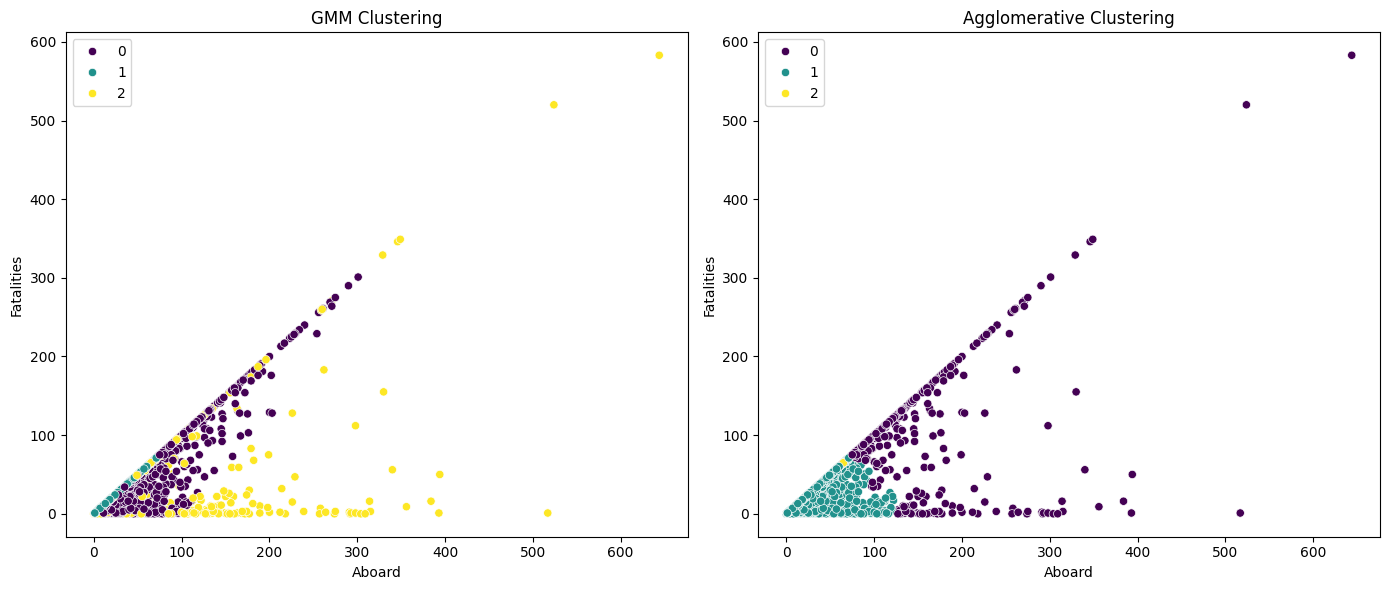

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Visualize GMM Clusters
sns.scatterplot(x=df_clustering['Aboard'], y=df_clustering['Fatalities'], hue=gmm_labels, palette='viridis', ax=ax1)
ax1.set_title('GMM Clustering')
ax1.set_xlabel('Aboard')
ax1.set_ylabel('Fatalities')

# Visualize Agglomerative Clustering
sns.scatterplot(x=df_clustering['Aboard'], y=df_clustering['Fatalities'], hue=agg_labels, palette='viridis', ax=ax2)
ax2.set_title('Agglomerative Clustering')
ax2.set_xlabel('Aboard')
ax2.set_ylabel('Fatalities')

plt.tight_layout()
plt.show()
